In [1]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [2]:
#제공된 데이터 셋 import

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
#학습할 class name 정의
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#각종 shapt확인
print('train_images.shape: '+str(train_images.shape))

print('len(train_labels): '+str(len(train_labels)))

print('test_images.shape: '+str(test_images.shape))

print('len(test_labels): '+str(len(test_labels)))

train_images.shape: (60000, 28, 28)
len(train_labels): 60000
test_images.shape: (10000, 28, 28)
len(test_labels): 10000


In [5]:
#train label은 0과 9사이의 정수 입니다.
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

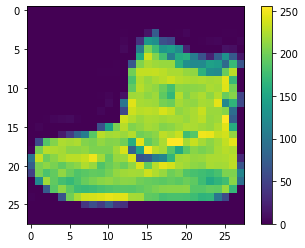

In [6]:
#데이터 전처리를 위해서 데이터 확인 값의 범위 등
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
#0~1사이의 값으로 Normalize를 시켜 준다.
train_images = train_images / 255.0

test_images = test_images / 255.0

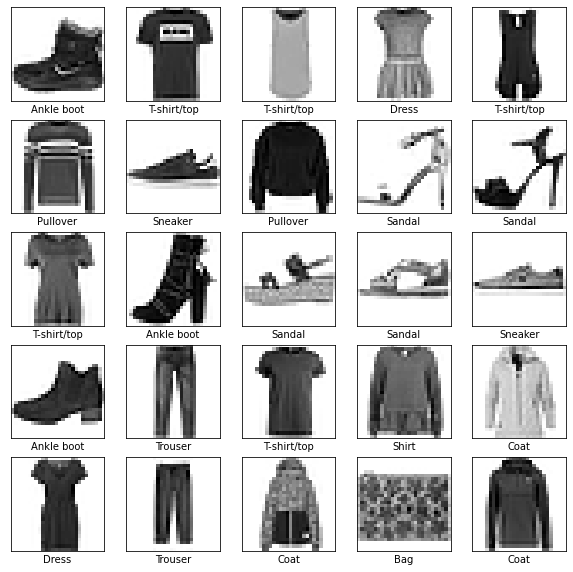

In [8]:
#학습 데이터 라벨과 모양 확인
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
#가장 기본적인 모델 구현
#Perceptron
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

In [10]:
# Optimizer 정의 loss 정의 metrics정의
#설명 하기 
optim=tf.keras.optimizers.Adam(
    learning_rate=0.05, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)
model.compile(optimizer=optim,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
#학습 시작하기 데이터 X그리고 y데이터 Epoch정의
model.fit(train_images, train_labels, epochs=5)

#테스트 정확도 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.9267 - accuracy: 0.6679
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8791 - accuracy: 0.6826
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8729 - accuracy: 0.6860
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8913 - accuracy: 0.6867
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8787 - accuracy: 0.6823
313/313 - 0s - loss: 0.9878 - accuracy: 0.6452

테스트 정확도: 0.6452000141143799


In [23]:
#학습이 제대로 되지 않았 습니다. 
#어떻게 하면 될까요?
#모델 depth 수정?
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
#학습 파라미터(learning rate) 수정?
optim=tf.keras.optimizers.Adam(
    learning_rate=0.05, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)
model.compile(optimizer=optim,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#epoch? 이렇게 여러가지 시도를 해 보시기를 바라겠습니다. 
model.fit(train_images, train_labels, epochs=5)
#테스트 정확도 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5184 - accuracy: 0.8199
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3951 - accuracy: 0.8581
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3626 - accuracy: 0.8690
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3357 - accuracy: 0.8780
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3188 - accuracy: 0.8839
313/313 - 0s - loss: 0.3730 - accuracy: 0.8687

테스트 정확도: 0.8687000274658203


In [13]:
#훈련된 모델 사용 하기.
predictions = model.predict(test_images)
#예측 값이 어떻게 나오는지 관찰!!
print('output value: ',str(predictions[0]))
#선택 방법 argmax기법
print('선택 한 번호: ',str(np.argmax(predictions[0])))
#정답 확인
print('정답: ',test_labels[0])

output value:  [0.0000000e+00 1.3153103e-34 0.0000000e+00 0.0000000e+00 0.0000000e+00
 2.2635388e-01 0.0000000e+00 1.8060000e-05 1.3698226e-13 7.7362800e-01]
선택 한 번호:  9
정답:  9


In [14]:
#그래프로 plot 시키는 함수 정의
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



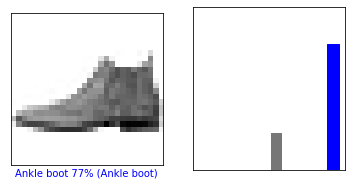

In [15]:
#위의 함수를 이용해서 0번째 원소의 이미지 확인
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

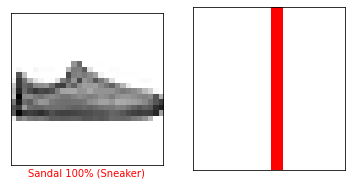

In [16]:
#12번째 원소의 이미지 및 결과 값 확인
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

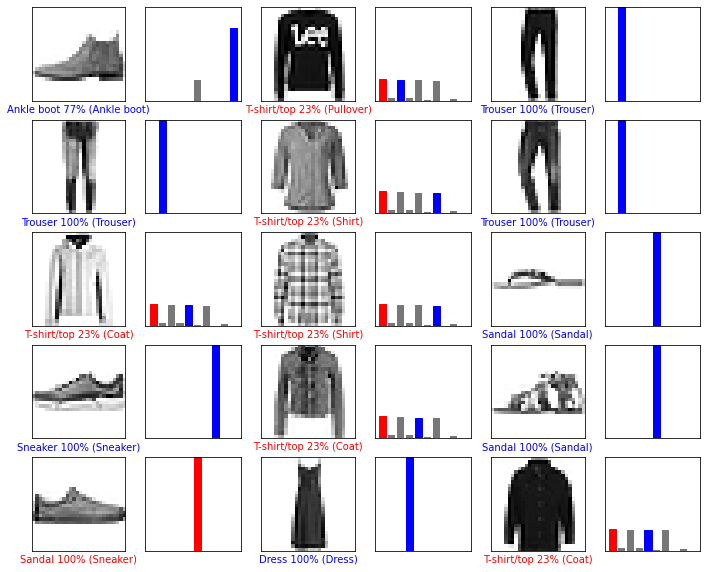

In [17]:
#15개의 이미지의 결과 값을 plot한다.
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()


In [30]:
#Perceptron에서 MLP로 수정 하기
#hint 아래의 code중 하나를 복사해서 추가 하면 됩니다.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

In [29]:
#학습 iteration을 늘리면 효과가 있을까?
#수정 한 모델의 정확도 확인.
model.fit(train_images, train_labels, epochs=5)
#정확도 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5055 - accuracy: 0.8198
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3726 - accuracy: 0.8654
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3366 - accuracy: 0.8766
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3191 - accuracy: 0.8824
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3026 - accuracy: 0.8877
313/313 - 0s - loss: 0.3475 - accuracy: 0.8727

테스트 정확도: 0.8726999759674072


In [31]:
#이제 간단하게 CNN을 활용하여 학습 해 보도록 하겠습니다. 
#tensorflow에는 여러가지 방식으로 모델을 만드는 방법이 있습니다. 
img_input = layers.Input(shape=(28, 28, 1))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x=layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x=layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(128, 3, activation='relu')(x)
x=layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(256, activation='relu')(x)
x=layers.BatchNormalization()(x)
x=layers.Dropout(0.15)(x)
output = layers.Dense(10, activation='softmax')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)
model.summary()

In [33]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#Question.2 학습 iteration을 늘리시오
#수정 한 모델의 정확도 확인.
model.fit(train_images, train_labels, epochs=5)
#정확도 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 36s 4ms/step - loss: 0.4942 - accuracy: 0.8221
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3550 - accuracy: 0.8708
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3054 - accuracy: 0.8877
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2763 - accuracy: 0.8980
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2484 - accuracy: 0.9087
313/313 - 1s - loss: 0.2993 - accuracy: 0.8922

테스트 정확도: 0.8921999931335449
